In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [7]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

2022-10-04 16:10:35.246028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [12]:
history = model.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7117 - accuracy: 0.7647 - val_loss: 0.5401 - val_accuracy: 0.8144
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4894 - accuracy: 0.8292 - val_loss: 0.4414 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8447 - val_loss: 0.4143 - val_accuracy: 0.8616
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4180 - accuracy: 0.8538 - val_loss: 0.4194 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3987 - accuracy: 0.8601 - val_loss: 0.3919 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3822 - accuracy: 0.8649 - val_loss: 0.3777 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3703 - accuracy: 0.8685 - val_loss: 0.3646 - val_accuracy:

In [13]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

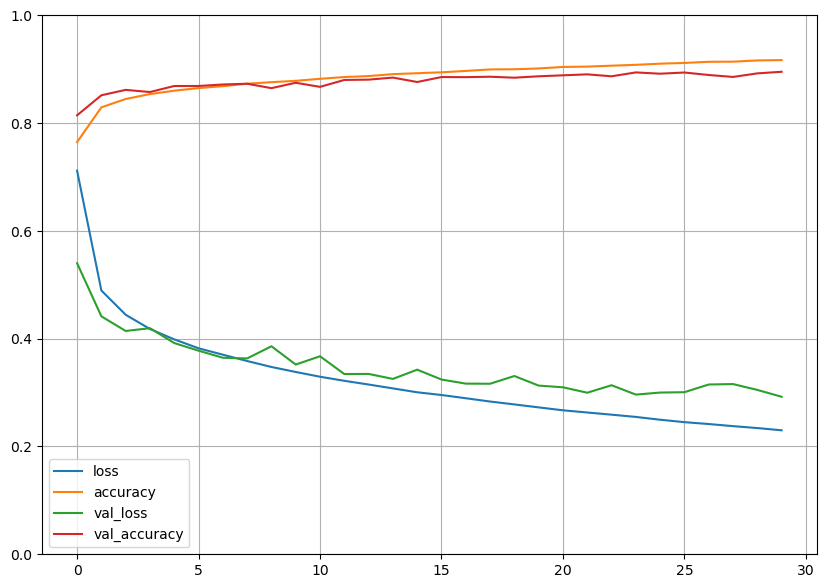

In [15]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 727us/step - loss: 67.4200 - accuracy: 0.8466


[67.41996002197266, 0.8465999960899353]

In [17]:
X_new = X_test[:3]

In [19]:
y_prob = model.predict(X_new)

1/1 [==============================] - 0s 61ms/step


In [20]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [22]:
y_new[0]

9